In [1]:
!hadoop fs -mkdir /sw_dataset
!hadoop fs -put ./SW_EpisodeIV.txt /sw_dataset/SW_EpisodeIV.txt
!hadoop fs -put ./SW_EpisodeV.txt /sw_dataset/SW_EpisodeV.txt
!hadoop fs -put ./SW_EpisodeVI.txt /sw_dataset/SW_EpisodeVI.txt

In [19]:
!pip install mrjob
!pip install matplotlib
!pip install pandas
!pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 4.0 MB/s eta 0:00:0000:0100:01


In [43]:
import pandas as pd
from pyarrow import fs
from io import StringIO

hdfs = fs.HadoopFileSystem("namenode", 8020)

def show_hist(report_name):
    with hdfs.open_input_stream(report_name) as file:
        data = file.readall().decode("utf-8")

    df = pd.read_csv(StringIO(data), sep="\t", header=None)
    df.plot.bar(x=0)

In [3]:
%%file task1.py

from mrjob.job import MRJob
from mrjob.step import MRStep

class MRTask1(MRJob):
    def mapper_init(self):
        self.count = {}
    
    def mapper(self, _, line):
        row_id, row = line.split(' ', 1)
        row_id = row.split('"', 2)[1]
        if row_id != 'character':
            character_name = row.split('"', 2)[1]
            self.count.setdefault(character_name, 0)
            self.count[character_name] += 1

    def mapper_final(self):
        for character_name, phrases_count in self.count.items():
            yield character_name, phrases_count

    def reducer_init(self):
        self.final_count = {}
    
    def reducer(self, character_name, phrases_counts):
        yield None, (character_name, sum(phrases_counts))

    def reducer_all_data(self, _, final_count_pairs):
        final_count_pairs = sorted(
            final_count_pairs,
            reverse=True,
            key=lambda x: x[1]
        )[:20]
        for character_name, phrases_count in final_count_pairs:
            yield character_name, phrases_count
    
    def steps(self):
        return [
            MRStep(
                mapper_init=self.mapper_init,
                mapper=self.mapper,
                mapper_final=self.mapper_final,
                reducer_init=self.reducer_init,
                reducer=self.reducer,
            ),
            MRStep(reducer=self.reducer_all_data)
        ]
            
        
if __name__ == "__main__":
    MRTask1.run()

Writing task1.py


## Локальный запуск

In [59]:
!python3 task1.py SW_EpisodeIV.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task1.root.20231125.125605.817969
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/task1.root.20231125.125605.817969/output
Streaming final output from /tmp/task1.root.20231125.125605.817969/output...
"LUKE"	254
"HAN"	153
"THREEPIO"	119
"BEN"	82
"LEIA"	57
"VADER"	41
"RED LEADER"	37
"BIGGS"	34
"TARKIN"	28
"OWEN"	25
"TROOPER"	19
"GOLD LEADER"	14
"WEDGE"	14
"OFFICER"	11
"RED TEN"	8
"GOLD FIVE"	7
"GREEDO"	6
"INTERCOM VOICE"	6
"JABBA"	6
"DEATH STAR INTERCOM VOICE"	6
Removing temp directory /tmp/task1.root.20231125.125605.817969...


In [60]:
!python3 task1.py SW_EpisodeV.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task1.root.20231125.125612.689894
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/task1.root.20231125.125612.689894/output
Streaming final output from /tmp/task1.root.20231125.125612.689894/output...
"HAN"	182
"LUKE"	128
"LEIA"	114
"THREEPIO"	92
"LANDO"	61
"VADER"	56
"YODA"	36
"PIETT"	23
"CREATURE"	21
"BEN"	15
"RIEEKAN"	13
"WEDGE"	8
"VEERS"	7
"DECK OFFICER"	7
"ZEV"	6
"NEEDA"	5
"OZZEL"	5
"EMPEROR"	5
"JANSON"	4
"DACK"	4
Removing temp directory /tmp/task1.root.20231125.125612.689894...


In [61]:
!python3 task1.py SW_EpisodeVI.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task1.root.20231125.125621.996133
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/task1.root.20231125.125621.996133/output
Streaming final output from /tmp/task1.root.20231125.125621.996133/output...
"HAN"	124
"LUKE"	112
"THREEPIO"	90
"LEIA"	56
"VADER"	43
"LANDO"	40
"EMPEROR"	39
"JABBA"	20
"BEN"	18
"ACKBAR"	14
"YODA"	13
"WEDGE"	11
"PIETT"	8
"JERJERROD"	7
"BOUSHH"	7
"COMMANDER"	7
"STORMTROOPER"	6
"BIB"	6
"NINEDENINE"	6
"CONTROLLER"	5
Removing temp directory /tmp/task1.root.20231125.125621.996133...


In [58]:
!python3 task1.py SW_EpisodeIV.txt SW_EpisodeV.txt SW_EpisodeVI.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task1.root.20231125.125452.537398
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/task1.root.20231125.125452.537398/output
Streaming final output from /tmp/task1.root.20231125.125452.537398/output...
"LUKE"	494
"HAN"	459
"THREEPIO"	301
"LEIA"	227
"VADER"	140
"BEN"	115
"LANDO"	101
"YODA"	49
"EMPEROR"	44
"RED LEADER"	38
"BIGGS"	34
"WEDGE"	33
"PIETT"	31
"TARKIN"	28
"JABBA"	26
"OWEN"	25
"CREATURE"	22
"TROOPER"	19
"GOLD LEADER"	14
"ACKBAR"	14
Removing temp directory /tmp/task1.root.20231125.125452.537398...


## Запуск в кластере

In [4]:
!python3 task1.py -r hadoop hdfs://namenode:8020/sw_dataset/SW_EpisodeIV.txt --output /output/task1_ep4

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task1.root.20231125.151300.837352
uploading working dir files to hdfs:///user/root/tmp/mrjob/task1.root.20231125.151300.837352/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task1.root.20231125.151300.837352/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar1310790591113778276/] [] /tmp/streamjob2227489950357029491.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.20.0.6:8032
  Connecting to ResourceManager at resourcemanager/172.20.0.6:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1700924815545_0001
  Total input fi

In [5]:
!hadoop fs -ls /output/task1_ep4

Found 2 items
-rw-r--r--   3 root supergroup          0 2023-11-25 18:14 /output/task1_ep4/_SUCCESS
-rw-r--r--   3 root supergroup        253 2023-11-25 18:14 /output/task1_ep4/part-00000


In [6]:
!hadoop fs -cat /output/task1_ep4/part-00000

"LUKE"	254
"HAN"	153
"THREEPIO"	119
"BEN"	82
"LEIA"	57
"VADER"	41
"RED LEADER"	37
"BIGGS"	34
"TARKIN"	28
"OWEN"	25
"TROOPER"	19
"WEDGE"	14
"GOLD LEADER"	14
"OFFICER"	11
"RED TEN"	8
"GOLD FIVE"	7
"JABBA"	6
"INTERCOM VOICE"	6
"GREEDO"	6
"FIRST TROOPER"	6


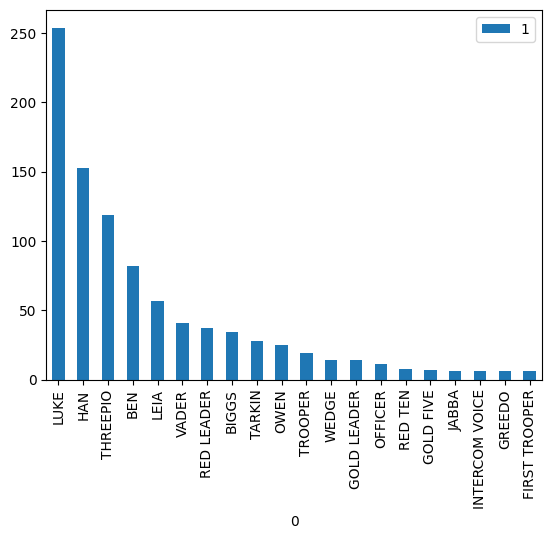

In [45]:
show_hist("/output/task1_ep4/part-00000")

In [12]:
!python3 task1.py -r hadoop hdfs://namenode:8020/sw_dataset/SW_EpisodeV.txt --output /output/task1_ep5

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task1.root.20231125.152457.857281
uploading working dir files to hdfs:///user/root/tmp/mrjob/task1.root.20231125.152457.857281/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task1.root.20231125.152457.857281/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar6371758712970524866/] [] /tmp/streamjob769464199291798170.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.20.0.6:8032
  Connecting to ResourceManager at resourcemanager/172.20.0.6:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1700924815545_0007
  Total input fil

In [13]:
!hadoop fs -cat /output/task1_ep5/part-00000

"HAN"	182
"LUKE"	128
"LEIA"	114
"THREEPIO"	92
"LANDO"	61
"VADER"	56
"YODA"	36
"PIETT"	23
"CREATURE"	21
"BEN"	15
"RIEEKAN"	13
"WEDGE"	8
"VEERS"	7
"DECK OFFICER"	7
"ZEV"	6
"OZZEL"	5
"NEEDA"	5
"EMPEROR"	5
"JANSON"	4
"DACK"	4


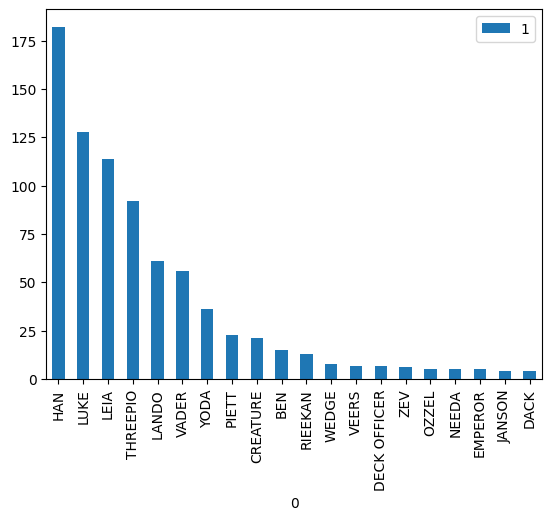

In [44]:
show_hist("/output/task1_ep5/part-00000")

In [14]:
!python3 task1.py -r hadoop hdfs://namenode:8020/sw_dataset/SW_EpisodeVI.txt --output /output/task1_ep6

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task1.root.20231125.152756.533677
uploading working dir files to hdfs:///user/root/tmp/mrjob/task1.root.20231125.152756.533677/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task1.root.20231125.152756.533677/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar1730881021571905025/] [] /tmp/streamjob1520395453320639935.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.20.0.6:8032
  Connecting to ResourceManager at resourcemanager/172.20.0.6:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1700924815545_0008
  Total input fi

In [15]:
!hadoop fs -cat /output/task1_ep6/part-00000

"HAN"	124
"LUKE"	112
"THREEPIO"	90
"LEIA"	56
"VADER"	43
"LANDO"	40
"EMPEROR"	39
"JABBA"	20
"BEN"	18
"ACKBAR"	14
"YODA"	13
"WEDGE"	11
"PIETT"	8
"JERJERROD"	7
"COMMANDER"	7
"BOUSHH"	7
"STORMTROOPER"	6
"NINEDENINE"	6
"BIB"	6
"CONTROLLER"	5


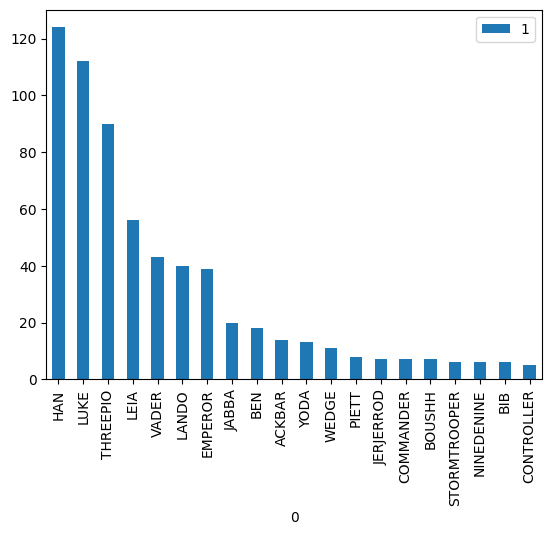

In [47]:
show_hist("/output/task1_ep6/part-00000")

In [16]:
!python3 task1.py -r hadoop hdfs://namenode:8020/sw_dataset/SW_EpisodeIV.txt hdfs://namenode:8020/sw_dataset/SW_EpisodeV.txt hdfs://namenode:8020/sw_dataset/SW_EpisodeVI.txt --output /output/task1_all_episodes

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task1.root.20231125.153042.308450
uploading working dir files to hdfs:///user/root/tmp/mrjob/task1.root.20231125.153042.308450/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task1.root.20231125.153042.308450/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar3166428109104311792/] [] /tmp/streamjob5451297897810392868.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.20.0.6:8032
  Connecting to ResourceManager at resourcemanager/172.20.0.6:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1700924815545_0010
  Total input fi

In [17]:
!hadoop fs -cat /output/task1_all_episodes/part-00000

"LUKE"	494
"HAN"	459
"THREEPIO"	301
"LEIA"	227
"VADER"	140
"BEN"	115
"LANDO"	101
"YODA"	49
"EMPEROR"	44
"RED LEADER"	38
"BIGGS"	34
"WEDGE"	33
"PIETT"	31
"TARKIN"	28
"JABBA"	26
"OWEN"	25
"CREATURE"	22
"TROOPER"	19
"GOLD LEADER"	14
"ACKBAR"	14


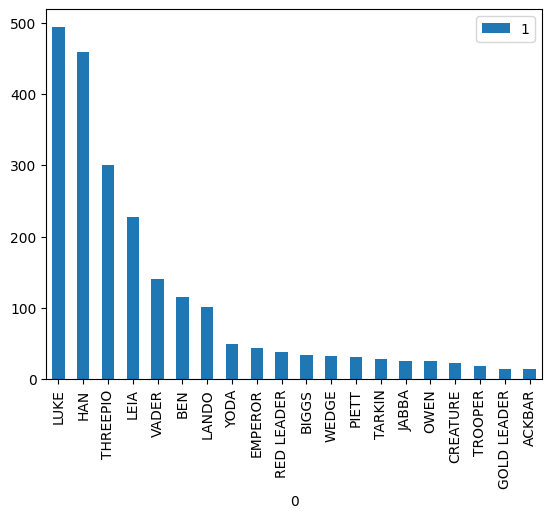

In [46]:
show_hist("/output/task1_all_episodes/part-00000")

## Проверим результат в pandas

In [5]:
data_files = [
    "SW_EpisodeIV.txt",
    "SW_EpisodeV.txt",
    "SW_EpisodeVI.txt",
]

In [6]:
def read_episode_data(filename):
    return pd.read_csv(filename, sep =' ', header=0, escapechar='\\')

In [9]:
all_episodes_data = pd.concat([read_episode_data(filename) for filename in data_files])

In [10]:
all_episodes_data

,character,dialogue
1,THREEPIO,Did you hear that? They've shut down the main...
2,THREEPIO,We're doomed!
3,THREEPIO,There'll be no escape for the Princess this time.
4,THREEPIO,What's that?
5,THREEPIO,I should have known better than to trust the l...
...,...,...
670,LANDO,"Wedge, I don't think we're going to make it."
671,WEDGE,You'll make it. Just follow me Gold Leader.
672,LANDO,I promised to return his ship without a scratc...
673,HAN,Lando...


<Axes: xlabel='character'>

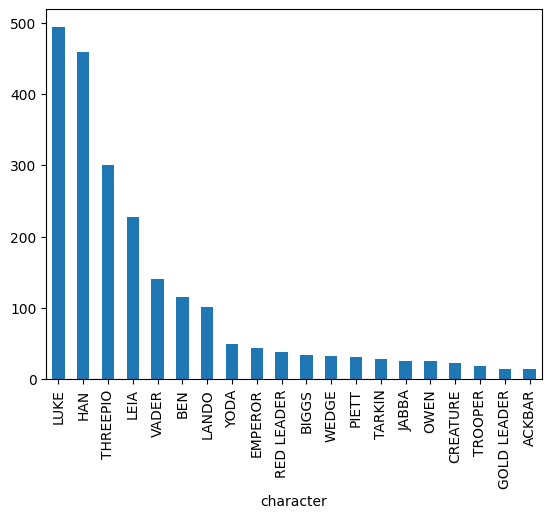

In [15]:
all_episodes_data.character.value_counts()[:20].plot.bar()

In [ ]:
!hadoop fs -get /hdfs/source/path /localfs/destination/path